🔹 STEP 1: Data Collection

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Thanvi S Shetty\OneDrive\Desktop\Internship\Airbnb Prediction\AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


🔹 STEP 2: Data Exploration

In [3]:
df.groupby("room_type")["price"].mean()
df.groupby("neighbourhood_group")["price"].mean()


neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

🔹 STEP 3: Data Preprocessing

In [4]:
df = df[df["price"] < 500]


In [5]:
df.dropna(inplace=True)


In [6]:
df = pd.get_dummies(df, columns=["room_type", "neighbourhood_group"], drop_first=True)


🔹 STEP 4: Exploratory Data Analysis (EDA)

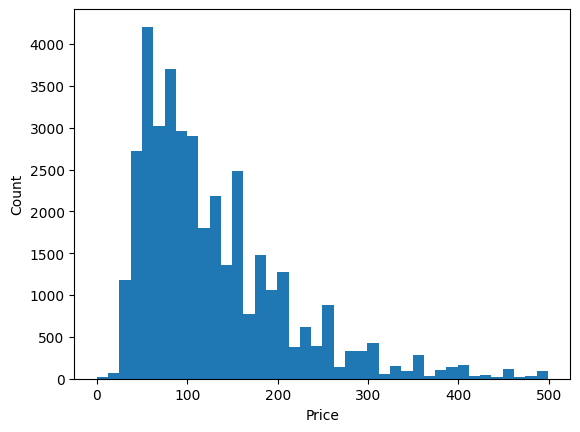

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=40)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


🔹 STEP 5: Feature Selection

In [8]:
X = df['number_of_reviews'].values
y = df['price'].values


🔹 STEP 6: Model Training

In [10]:
import numpy as np

# Mean values
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate slope (m) and intercept (c)
m = np.sum((X - x_mean)*(y - y_mean)) / np.sum((X - x_mean)**2)
c = y_mean - m * x_mean

print("Slope:", m)
print("Intercept:", c)


Slope: -0.05355696874051385
Intercept: 128.52496961528402


🔹 7. Price Prediction

In [11]:
# Predict prices
y_pred = m * X + c

# Mean Absolute Error
mae = np.mean(np.abs(y - y_pred))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 62.19133376131108
